In [1]:

import numpy as np
import matplotlib.pyplot as plt
import synthetic_data

from numpy.linalg import norm


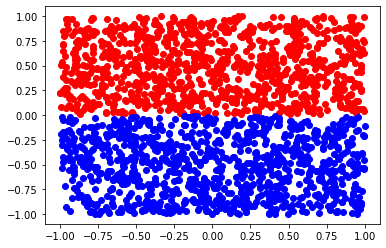

In [2]:
a = 0 # np.random.uniform(0,1)
contexts = synthetic_data.LinearContexts( np.array([a,1-a]), 0, 2, 0.01)

# contexts.generate_unique_context()
      
classA, classB = [], []

for _ in range(1000):
    c0 = contexts.get_context(0) 
    c1 = contexts.get_context(1) 
    classA.append( c0 )
    classB.append( c1 )

classA = np.array( classA )
classB = np.array( classB )
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')

plt.savefig('./linear.pdf')

In [10]:
contexts.shape

(1000, 28)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
classA = np.array(classA).squeeze()
contexts = PolynomialFeatures(6).fit_transform( classA)

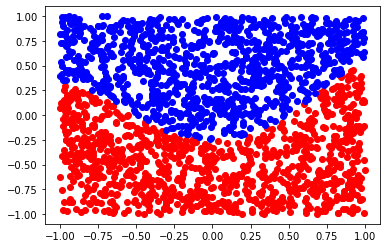

In [5]:

a = 0 # np.random.uniform(0,1)
contexts = synthetic_data.QuinticContexts( 2, 0.01)

# contexts.generate_unique_context()
      
classA, classB = [], []

for _ in range(1000):
    c0 = contexts.get_context(0) 
    c1 = contexts.get_context(1) 
    classA.append( c0 )
    classB.append( c1 )

classA = np.array( classA )
classB = np.array( classB )
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')

plt.savefig('./quintic.pdf')

In [23]:
import numpy as np
it = 100
a = np.zeros( (2, it) )
a[1][10] = 2
a
# a.shape
a[:,100]

IndexError: index 100 is out of bounds for axis 1 with size 100

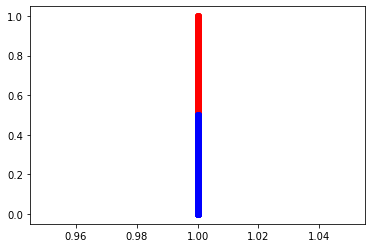

In [6]:
class ToyContexts:

    def __init__(self, ):
        pass

    def get_context(self, label):
        while True:
            context = np.random.uniform(0, 1, 1 )
            if   context >= 0.5 and label == 0:
                return [1,context] #/ norm(context, 1)
            elif  context < 0.5 and label == 1:
                return context #/ norm(context, 1)

    def generate_unique_context(self,):
        self.context_A = None
        self.context_B = None
        while  self.context_A == None or self.context_B == None:
            context = np.random.uniform(0, 1, 1)
            if context >= 0.5 and self.context_A == None :
                self.context_A = context #/ norm(context, 1)
            elif context < 0.5 and self.context_B == None:
                self.context_B = context #/ norm(context, 1)

    def get_same_context(self, label):
        if label == 0:
                return self.context_A
        elif label == 1:
                return self.context_B

contexts = ToyContexts(  )
contexts.generate_unique_context()
      
classA, classB = [], []

for _ in range(1000):
    c0 = contexts.get_context(0) 
    c1 = contexts.get_context(1) 

    classA.append( [1,c0] )
    classB.append( [1,c1] )

classA = np.array( classA , dtype=object)
classB = np.array( classB , dtype=object)
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')

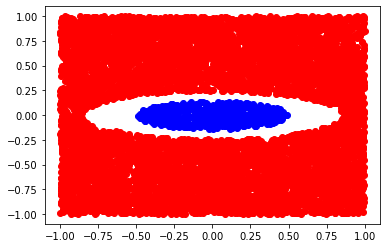

In [35]:

b = 0.2
a = 0.7
margin = 0.5

classA, classB = [], []
for _ in range(10000):
    point = np.random.uniform(-1, 1, 2)
    if ( point[0] / a)**2 + ( point[1] / b)**2 > 1 + margin:
        classA.append(point)
    elif ( point[0] / a)**2 + ( point[1] / b)**2 < 1 - margin:
        classB.append(point)

classA = np.array( classA )
classB = np.array( classB )
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')